<a href="https://colab.research.google.com/github/np03cs4a240386-prog/Concepts-and-Technologies-of-AI/blob/main/Worsheet7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/AI Workshop/california_housing_test.csv")

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)


Training shape: (2400, 8)
Test shape: (600, 8)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

train_mse_lr = mean_squared_error(y_train, y_train_pred)
test_mse_lr = mean_squared_error(y_test, y_test_pred)

print("Baseline Linear Regression")
print("Training MSE:", train_mse_lr)
print("Test MSE:", test_mse_lr)

print("Coefficients:")
print(lr.coef_)


Baseline Linear Regression
Training MSE: 4929634100.81988
Test MSE: 4586505886.68125
Coefficients:
[-4.40099473e+04 -4.33583030e+04  1.14711666e+03 -7.88631396e+00
  9.85275637e+01 -4.05048347e+01  6.14349440e+01  3.95481370e+04]


In [ ]:
alpha_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}


In [ ]:
ridge = Ridge()
ridge_cv = GridSearchCV(
    ridge, alpha_grid, cv=5,
    scoring='neg_mean_squared_error'
)
ridge_cv.fit(X_train, y_train)

best_ridge = ridge_cv.best_estimator_
print("Best Ridge alpha:", ridge_cv.best_params_)


Best Ridge alpha: {'alpha': 0.1}


In [ ]:
lasso = Lasso(max_iter=10000)
lasso_cv = GridSearchCV(
    lasso, alpha_grid, cv=5,
    scoring='neg_mean_squared_error'
)
lasso_cv.fit(X_train, y_train)

best_lasso = lasso_cv.best_estimator_
print("Best Lasso alpha:", lasso_cv.best_params_)


Best Lasso alpha: {'alpha': 0.01}


In [ ]:
# Ridge performance
ridge_train_pred = best_ridge.predict(X_train)
ridge_test_pred = best_ridge.predict(X_test)

print("Ridge MSE")
print("Train:", mean_squared_error(y_train, ridge_train_pred))
print("Test:", mean_squared_error(y_test, ridge_test_pred))

# Lasso performance
lasso_train_pred = best_lasso.predict(X_train)
lasso_test_pred = best_lasso.predict(X_test)

print("\nLasso MSE")
print("Train:", mean_squared_error(y_train, lasso_train_pred))
print("Test:", mean_squared_error(y_test, lasso_test_pred))


Ridge MSE
Train: 4929634124.405812
Test: 4586466773.474427

Lasso MSE
Train: 4929634100.820575
Test: 4586505674.537279


In [ ]:
print("Ridge coefficients:")
print(best_ridge.coef_)

print("\nLasso coefficients:")
print(best_lasso.coef_)

print("\nZero coefficients in Lasso:",
      np.sum(best_lasso.coef_ == 0))


Ridge coefficients:
[-4.40031070e+04 -4.33518752e+04  1.14722249e+03 -7.88684654e+00
  9.85207829e+01 -4.05051304e+01  6.14479287e+01  3.95484775e+04]

Lasso coefficients:
[-4.40099104e+04 -4.33582684e+04  1.14711716e+03 -7.88631611e+00
  9.85275216e+01 -4.05048366e+01  6.14350165e+01  3.95481382e+04]

Zero coefficients in Lasso: 0


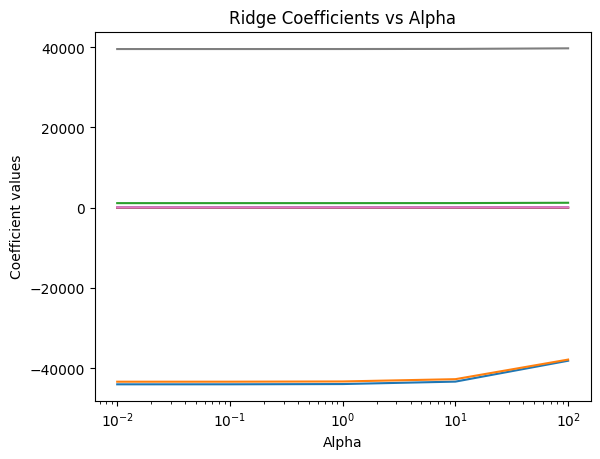

In [ ]:
alphas = [0.01, 0.1, 1, 10, 100]
coefs = []

for a in alphas:
    m = Ridge(alpha=a)
    m.fit(X_train, y_train)
    coefs.append(m.coef_)

plt.figure()
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Coefficient values")
plt.title("Ridge Coefficients vs Alpha")
plt.show()


In [ ]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)


Training shape: (455, 30)
Test shape: (114, 30)


In [ ]:
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train)

train_pred = log_reg.predict(X_train)
test_pred = log_reg.predict(X_test)

print("Baseline Logistic Regression Accuracy")
print("Train:", accuracy_score(y_train, train_pred))
print("Test:", accuracy_score(y_test, test_pred))

print("Coefficients:")
print(log_reg.coef_)


Baseline Logistic Regression Accuracy
Train: 0.9582417582417583
Test: 0.956140350877193
Coefficients:
[[ 1.0274368   0.22145051 -0.36213488  0.0254667  -0.15623532 -0.23771256
  -0.53255786 -0.28369224 -0.22668189 -0.03649446 -0.09710208  1.3705667
  -0.18140942 -0.08719575 -0.02245523  0.04736092 -0.04294784 -0.03240188
  -0.03473732  0.01160522  0.11165329 -0.50887722 -0.01555395 -0.016857
  -0.30773117 -0.77270908 -1.42859535 -0.51092923 -0.74689363 -0.10094404]]


In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

log_cv = GridSearchCV(
    LogisticRegression(max_iter=5000),
    param_grid,
    cv=5,
    scoring='accuracy'
)

log_cv.fit(X_train, y_train)
best_log = log_cv.best_estimator_

print("Best parameters:", log_cv.best_params_)


Best parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
train_pred = best_log.predict(X_train)
test_pred = best_log.predict(X_test)

print("Optimized Logistic Regression Accuracy")
print("Train:", accuracy_score(y_train, train_pred))
print("Test:", accuracy_score(y_test, test_pred))

print("Optimized coefficients:")
print(best_log.coef_)

print("Zero coefficients:",
      np.sum(best_log.coef_ == 0))


Optimized Logistic Regression Accuracy
Train: 0.989010989010989
Test: 0.9824561403508771
Optimized coefficients:
[[ 7.67341762e-01 -1.08754087e-01  9.70962908e-02 -2.47488876e-03
   0.00000000e+00  4.74118517e+01 -1.16533303e+01 -1.36579686e+02
   1.98950670e+01  0.00000000e+00  0.00000000e+00  1.72136013e+00
   0.00000000e+00 -1.97401217e-01  0.00000000e+00  0.00000000e+00
   4.99999281e+01  0.00000000e+00  1.88970748e+01  0.00000000e+00
   1.81346503e-01 -4.37283565e-01  5.61100896e-02 -2.06391352e-02
  -2.15309711e+01  7.94799084e+00 -1.46707848e+01 -2.51809103e+01
  -2.53308538e+01  0.00000000e+00]]
Zero coefficients: 9
